In [77]:
import lz4.block
import lz4.frame
import os

def buf2int(buf):
    v = 0
    for i, b in enumerate(buf):
        v += int(b) << (8*i)
    return v
def buf2hex(buf):
    return '.'.join(['%02x' % xx for xx in buf])

class AEDAT4(object):
    def __init__(self, filename):
        self.filename = filename
        
        with open(filename, 'rb') as f:
            buf = bytearray(f.read())
            assert buf[:14] == b'#!AER-DAT4.0\r\n'
            
            size = buf2int(buf[14:18])
            self.header_unknown = buf[18:52]
            assert self.header_unknown[4:8] == b'IOHE'
            self.info = buf[18+52:size+14].decode()
            self.header_unknown2 = buf[size+14:size+14+4]
            
            index = size+14+4
            
            self.blocks = []
            while True:
                datacode = buf2int(buf[index:index+4])
                size = buf2int(buf[index+4:index+8])
                assert buf[index+8:index+15] == b'\x04"M\x18@@\xc0'
                ctx = lz4.frame.create_decompression_context()
                d = b''
                while True:
                    data, size2, finished = lz4.frame.decompress_chunk(ctx, buf[index+8:])
                    assert size2 == size
                    d += data
                    if finished:
                        index += size + 8
                        break
                    else:                        
                        index += size
                self.blocks.append(d)
                
                datatype = d[8:12].decode()
                print(datacode, datatype, len(d), buf2int(d[:4]), buf2int(d[4:8]))
                
                if len(self.blocks)>30:
                    break
            
#f = AEDAT4('Drone_Cam102_test1-2020_01_30_13_30_05.aedat4')
f = AEDAT4('Drone_Cam102_test2-2020_01_30_13_35_05.aedat4')



#print(f.info)
#print(buf2int(f.header_unknown[:4]), f.header_unknown[4:8].decode(), buf2hex(f.header_unknown))
#print(buf2int(f.header_unknown2[:4]), len(f.header_unknown2), f.header_unknown2)
        
#print(len(f.blocks[0]))

3 TRIG 64 60 20
0 EVTS 90496 90492 16
2 IMUS 520 516 16
3 TRIG 64 60 20
0 EVTS 92000 91996 16
1 FRME 90064 90060 40
2 IMUS 520 516 16
0 EVTS 93216 93212 16
2 IMUS 520 516 16
3 TRIG 80 76 16
0 EVTS 100560 100556 16
2 IMUS 520 516 16
3 TRIG 64 60 20
0 EVTS 97568 97564 16
2 IMUS 520 516 16
3 TRIG 64 60 20
0 EVTS 98640 98636 16
1 FRME 90064 90060 40
2 IMUS 520 516 16
0 EVTS 99328 99324 16
2 IMUS 520 516 16
0 EVTS 104544 104540 16
2 IMUS 520 516 16
3 TRIG 80 76 16
3 TRIG 64 60 20
0 EVTS 101088 101084 16
2 IMUS 520 516 16
3 TRIG 64 60 20
0 EVTS 100800 100796 16
1 FRME 90064 90060 40
2 IMUS 520 516 16


In [34]:
def display(d):
    for i in range(0, len(d), 8):
        print(' '.join('%02x'%xx for xx in d[i:i+8]))
        
display(f.blocks[1][32:])  



0e 17 3b b7 5f 9d 05 00
e7 00 6e 00 00 00 00 00
0e 17 3b b7 5f 9d 05 00
02 01 8d 00 01 00 00 00
0f 17 3b b7 5f 9d 05 00
bc 00 78 00 00 00 00 00
12 17 3b b7 5f 9d 05 00
f7 00 6c 00 00 00 00 00
14 17 3b b7 5f 9d 05 00
bb 00 5d 00 01 00 00 00
15 17 3b b7 5f 9d 05 00
e6 00 6b 00 01 00 00 00
15 17 3b b7 5f 9d 05 00
f8 00 7b 00 01 00 00 00
15 17 3b b7 5f 9d 05 00
ba 00 7a 00 00 00 00 00
16 17 3b b7 5f 9d 05 00
c6 00 61 00 01 00 00 00
18 17 3b b7 5f 9d 05 00
f9 00 87 00 01 00 00 00
19 17 3b b7 5f 9d 05 00
f0 00 74 00 00 00 00 00
1d 17 3b b7 5f 9d 05 00
ba 00 8b 00 01 00 00 00
21 17 3b b7 5f 9d 05 00
f7 00 8c 00 01 00 00 00
21 17 3b b7 5f 9d 05 00
b7 00 8a 00 01 00 00 00
22 17 3b b7 5f 9d 05 00
ca 00 66 00 00 00 00 00
23 17 3b b7 5f 9d 05 00
f5 00 70 00 01 00 00 00
23 17 3b b7 5f 9d 05 00
f3 00 97 00 01 00 00 00
25 17 3b b7 5f 9d 05 00
c3 00 66 00 00 00 00 00
25 17 3b b7 5f 9d 05 00
b5 00 66 00 00 00 00 00
25 17 3b b7 5f 9d 05 00
bd 00 5c 00 01 00 00 00
26 17 3b b7 5f 9d 05 00
f7 00 83 00 01 0

a2 1c 3b b7 5f 9d 05 00
f4 00 95 00 01 00 00 00
a3 1c 3b b7 5f 9d 05 00
00 01 87 00 01 00 00 00
a5 1c 3b b7 5f 9d 05 00
f9 00 6d 00 01 00 00 00
a7 1c 3b b7 5f 9d 05 00
f7 00 86 00 01 00 00 00
aa 1c 3b b7 5f 9d 05 00
f8 00 76 00 01 00 00 00
ab 1c 3b b7 5f 9d 05 00
fd 00 6f 00 01 00 00 00
ab 1c 3b b7 5f 9d 05 00
fa 00 92 00 00 00 00 00
ac 1c 3b b7 5f 9d 05 00
f9 00 78 00 01 00 00 00
ad 1c 3b b7 5f 9d 05 00
c5 00 67 00 00 00 00 00
b0 1c 3b b7 5f 9d 05 00
03 01 87 00 01 00 00 00
b1 1c 3b b7 5f 9d 05 00
f7 00 8f 00 00 00 00 00
b3 1c 3b b7 5f 9d 05 00
e8 00 72 00 00 00 00 00
b4 1c 3b b7 5f 9d 05 00
b7 00 7d 00 00 00 00 00
b9 1c 3b b7 5f 9d 05 00
f6 00 6e 00 01 00 00 00
bc 1c 3b b7 5f 9d 05 00
ac 00 62 00 00 00 00 00
bc 1c 3b b7 5f 9d 05 00
ff 00 94 00 00 00 00 00
bf 1c 3b b7 5f 9d 05 00
ba 00 82 00 00 00 00 00
bf 1c 3b b7 5f 9d 05 00
e6 00 6d 00 01 00 00 00
c1 1c 3b b7 5f 9d 05 00
01 01 87 00 01 00 00 00
c2 1c 3b b7 5f 9d 05 00
b7 00 8f 00 01 00 00 00
c7 1c 3b b7 5f 9d 05 00
f6 00 9f 00 01 0

fb 00 6a 00 01 00 00 00
7c 25 3b b7 5f 9d 05 00
f1 00 8a 00 00 00 00 00
7e 25 3b b7 5f 9d 05 00
b0 00 79 00 00 00 00 00
84 25 3b b7 5f 9d 05 00
fc 00 6d 00 01 00 00 00
87 25 3b b7 5f 9d 05 00
b7 00 8d 00 01 00 00 00
8b 25 3b b7 5f 9d 05 00
ff 00 95 00 00 00 00 00
8c 25 3b b7 5f 9d 05 00
ea 00 87 00 00 00 00 00
8e 25 3b b7 5f 9d 05 00
e6 00 7b 00 00 00 00 00
8f 25 3b b7 5f 9d 05 00
c9 00 6a 00 00 00 00 00
92 25 3b b7 5f 9d 05 00
f0 00 89 00 00 00 00 00
94 25 3b b7 5f 9d 05 00
f2 00 6c 00 01 00 00 00
95 25 3b b7 5f 9d 05 00
11 01 4a 00 01 00 00 00
99 25 3b b7 5f 9d 05 00
bb 00 65 00 01 00 00 00
9a 25 3b b7 5f 9d 05 00
bb 00 69 00 01 00 00 00
9c 25 3b b7 5f 9d 05 00
fa 00 6a 00 01 00 00 00
9c 25 3b b7 5f 9d 05 00
f2 00 65 00 00 00 00 00
9c 25 3b b7 5f 9d 05 00
fd 00 86 00 01 00 00 00
9d 25 3b b7 5f 9d 05 00
b9 00 7a 00 01 00 00 00
9d 25 3b b7 5f 9d 05 00
fe 00 8d 00 01 00 00 00
9e 25 3b b7 5f 9d 05 00
f3 00 64 00 00 00 00 00
9f 25 3b b7 5f 9d 05 00
f1 00 6a 00 00 00 00 00
9f 25 3b b7 5f 9

df 2d 3b b7 5f 9d 05 00
04 01 9d 00 00 00 00 00
df 2d 3b b7 5f 9d 05 00
f3 00 8e 00 01 00 00 00
e1 2d 3b b7 5f 9d 05 00
cb 00 69 00 01 00 00 00
e5 2d 3b b7 5f 9d 05 00
ee 00 65 00 00 00 00 00
e6 2d 3b b7 5f 9d 05 00
a5 00 87 00 01 00 00 00
e6 2d 3b b7 5f 9d 05 00
c3 00 66 00 01 00 00 00
ea 2d 3b b7 5f 9d 05 00
af 00 81 00 00 00 00 00
ea 2d 3b b7 5f 9d 05 00
ef 00 83 00 00 00 00 00
eb 2d 3b b7 5f 9d 05 00
f0 00 70 00 00 00 00 00
ec 2d 3b b7 5f 9d 05 00
ec 00 8b 00 01 00 00 00
ec 2d 3b b7 5f 9d 05 00
e4 00 78 00 01 00 00 00
f3 2d 3b b7 5f 9d 05 00
b8 00 5d 00 00 00 00 00
f4 2d 3b b7 5f 9d 05 00
b2 00 77 00 01 00 00 00
f4 2d 3b b7 5f 9d 05 00
f5 00 88 00 00 00 00 00
f5 2d 3b b7 5f 9d 05 00
eb 00 89 00 01 00 00 00
f6 2d 3b b7 5f 9d 05 00
fb 00 9a 00 01 00 00 00
f6 2d 3b b7 5f 9d 05 00
f0 00 84 00 00 00 00 00
fb 2d 3b b7 5f 9d 05 00
0b 01 99 00 01 00 00 00
fc 2d 3b b7 5f 9d 05 00
cc 00 6c 00 01 00 00 00
ff 2d 3b b7 5f 9d 05 00
b0 00 87 00 01 00 00 00
01 2e 3b b7 5f 9d 05 00
f0 00 7c 00 00 0

a2 36 3b b7 5f 9d 05 00
b2 00 85 00 00 00 00 00
a2 36 3b b7 5f 9d 05 00
e9 00 6e 00 01 00 00 00
a3 36 3b b7 5f 9d 05 00
c4 00 6a 00 01 00 00 00
a4 36 3b b7 5f 9d 05 00
f3 00 6b 00 01 00 00 00
a4 36 3b b7 5f 9d 05 00
fa 00 79 00 01 00 00 00
a5 36 3b b7 5f 9d 05 00
02 01 95 00 01 00 00 00
a5 36 3b b7 5f 9d 05 00
bf 00 60 00 00 00 00 00
a7 36 3b b7 5f 9d 05 00
c3 00 68 00 01 00 00 00
a9 36 3b b7 5f 9d 05 00
03 01 99 00 01 00 00 00
aa 36 3b b7 5f 9d 05 00
ee 00 75 00 01 00 00 00
aa 36 3b b7 5f 9d 05 00
bd 00 65 00 01 00 00 00
ae 36 3b b7 5f 9d 05 00
f6 00 7b 00 00 00 00 00
b0 36 3b b7 5f 9d 05 00
b0 00 79 00 01 00 00 00
b1 36 3b b7 5f 9d 05 00
f0 00 8a 00 01 00 00 00
b5 36 3b b7 5f 9d 05 00
fe 00 9d 00 00 00 00 00
b6 36 3b b7 5f 9d 05 00
ed 00 81 00 00 00 00 00
b8 36 3b b7 5f 9d 05 00
f8 00 90 00 01 00 00 00
b8 36 3b b7 5f 9d 05 00
b8 00 66 00 01 00 00 00
bc 36 3b b7 5f 9d 05 00
ec 00 7f 00 00 00 00 00
c1 36 3b b7 5f 9d 05 00
fb 00 8d 00 00 00 00 00
c4 36 3b b7 5f 9d 05 00
f4 00 78 00 00 0

In [90]:
import numpy as np
d = f.blocks[7][32:]

dd = np.frombuffer(d, dtype='uint64')
t = dd[::2]
x = dd[1::2] & 0xFFFF
y = (dd[1::2] >> 16) & 0xFFFF
p = dd[1::2] >> 32


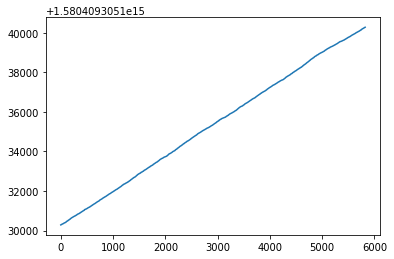

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(t)

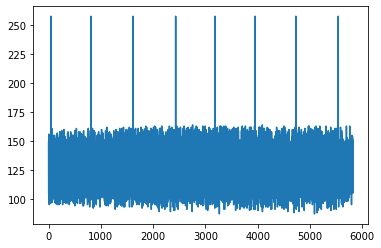

In [92]:
plt.plot(y)
#plt.xlim(0, 200)

In [93]:
np.unique(y)

array([ 87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       258], dtype=uint64)

In [94]:
np.unique(p)

array([0, 1], dtype=uint64)

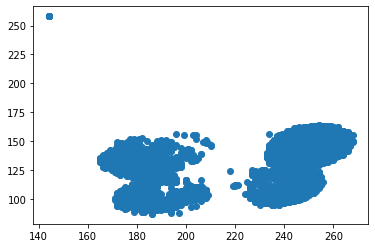

In [95]:
plt.scatter(x, y)